# Time Analysis prediction 

using the regrssion techniques can you predict the future of the <a href="../datasets/Financial Data - Forex.zip">stock</a> market based on the history of it ?

![Time analysis](https://magoosh.com/statistics/files/2018/05/time_series.png)

it would be great to predict one day in the future, one month and one year !

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [78]:
df = pd.read_csv("../../datasets/EURUSD_15m_BID_01.01.2010-31.12.2016.csv")
df.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [79]:
df.iloc[0, 0]

'2010-01-01 00:00'

In [80]:
pd.to_datetime(df['Time'])[0]

Timestamp('2010-01-01 00:00:00')

In [81]:
# Python program to Find day of 
# the week for a given date 
import datetime 
import calendar 

def findDay(date): 
    date = str(date)
    born = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').weekday() 
    return (calendar.day_name[born]) 

# Driver program 
date = '2018-02-03 00:12:1'
print(findDay(date)) 


Saturday


# If I've a datetime column I should make use of it by either sit is as an index to the DF or use its days , months or years

In [82]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [83]:
df['time_values'] = df.index.values
df.head()

,Open,High,Low,Close,Volume,time_values
Time,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00


In [84]:
df['days'] = df.time_values.apply(lambda x: x.day)
df.head()

,Open,High,Low,Close,Volume,time_values,days
Time,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00,1
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00,1
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00,1
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00,1
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00,1


In [85]:
df['day_name'] = df.time_values.apply(findDay)
df.head()

,Open,High,Low,Close,Volume,time_values,days,day_name
Time,,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00,1,Friday
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00,1,Friday
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00,1,Friday
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00,1,Friday
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00,1,Friday


In [86]:
# test average prediction
df['avg'] = (df['High'] + df['Low'])/2
df['mov'] = df['Close'] - df['Open']

def trans(x):
    if x >=0 :
        return True
    else:
        return False
df['mov'] = df['mov'].apply(trans)

pred_col = 'avg'
df = df[[pred_col]]

df.head()

,avg
Time,
2010-01-01 00:00:00,1.432585
2010-01-01 00:15:00,1.432620
2010-01-01 00:30:00,1.432710
2010-01-01 00:45:00,1.432615
2010-01-01 01:00:00,1.432490


In [87]:
df.head()

,avg
Time,
2010-01-01 00:00:00,1.432585
2010-01-01 00:15:00,1.432620
2010-01-01 00:30:00,1.432710
2010-01-01 00:45:00,1.432615
2010-01-01 01:00:00,1.432490


# How many reads we have per day ?

In [88]:
day_reads = len(df['2011-1-1'])
day_reads

96

# that's what we aiming for

In [90]:
forecast_out = day_reads*7 # predicting 1 week into future
df['Prediction'] = df[[pred_col]].shift(-forecast_out)

In [91]:
df.tail(96*7) #The last weak predictions becomes NaN

,avg,Prediction
Time,,
2016-12-25 00:00:00,1.04532,NaN
2016-12-25 00:15:00,1.04532,NaN
2016-12-25 00:30:00,1.04532,NaN
2016-12-25 00:45:00,1.04532,NaN
2016-12-25 01:00:00,1.04532,NaN
...,...,...
2016-12-31 22:45:00,1.05150,NaN
2016-12-31 23:00:00,1.05150,NaN
2016-12-31 23:15:00,1.05150,NaN


In [115]:
df.tail(96*7)

,avg,Prediction
Time,,
2016-12-25 00:00:00,1.04532,NaN
2016-12-25 00:15:00,1.04532,NaN
2016-12-25 00:30:00,1.04532,NaN
2016-12-25 00:45:00,1.04532,NaN
2016-12-25 01:00:00,1.04532,NaN
...,...,...
2016-12-31 22:45:00,1.05150,NaN
2016-12-31 23:00:00,1.05150,NaN
2016-12-31 23:15:00,1.05150,NaN


In [93]:
X = np.array(df.drop('Prediction', 1))
X

array([[1.432585],
       [1.43262 ],
       [1.43271 ],
       ...,
       [1.0515  ],
       [1.0515  ],
       [1.0515  ]])

In [95]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last forecast values =None
y_forecast = np.array(df[[pred_col]])[-forecast_out:]
X = X[:-forecast_out] # remove last forecast values from X

In [112]:
X_forecast

array([[1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04

In [116]:
y_forecast

array([[1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04532 ],
       [1.04

In [67]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01)

In [69]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9966883072190235


In [70]:
forecast_prediction = clf.predict(X_test)


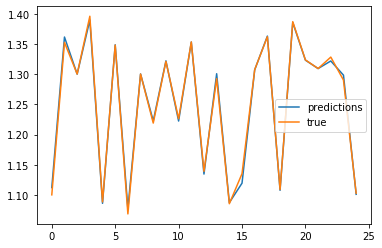

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
size = 25
plt.plot(forecast_prediction[:size], label='predictions');
plt.plot(y_test[:size], label='true');
plt.legend()
plt.show();

## Make it in one function   

In [109]:
def predict_ts(forecast_value):
    df['Prediction'] = df[[pred_col]].shift(-forecast_value)
    X = np.array(df.drop('Prediction', 1))
    X_forecast = X[-forecast_value:] # set X_forecast equal to last forecast values
    y_forecast = np.array(df[pred_col])[-forecast_value:]
    X = X[:-forecast_value] # remove last forecast values from X
    y = np.array(df['Prediction'])
    y = y[:-forecast_value]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02)
    # Training
    clf = LinearRegression()
    clf.fit(X_train,y_train)
    # Testing
    confidence = clf.score(X_test, y_test)
    print("confidence: ", confidence)
    forecast_prediction = clf.predict(X_test)
    plt.plot(forecast_prediction[:50], label='predictions');
    plt.plot(y_test[:50], label='true');
    plt.legend()
    plt.show();

confidence:  0.9968702046585974


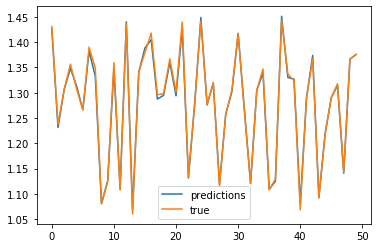

In [119]:
predict_ts(day_reads)

confidence:  0.17234930135233162


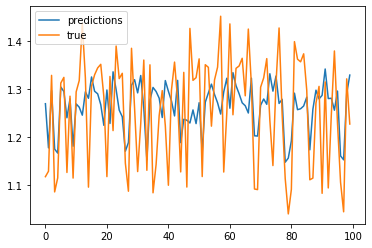

In [61]:
predict_ts(day_reads*7)

In [120]:
t = clf.predict(X_forecast)

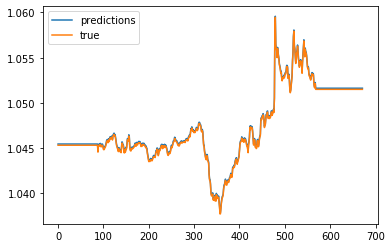

In [147]:

plt.plot(t, label='predictions');
plt.plot(X_forecast, label='true');
plt.legend()
plt.show();

# The prediction is pretty close to the actual values